<a href="https://colab.research.google.com/github/skhetrapal/kaggle_projects/blob/main/Kaggle_multi_class_prediction_obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_path = '/content/drive/My Drive/Colab data/Kaggle/multi-class-prediction-obesity/train.csv'
test_path = '/content/drive/My Drive/Colab data/Kaggle/multi-class-prediction-obesity/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [ ]:
test_df['NObeyesdad'] = 'XX'

In [ ]:
df = pd.concat([train_df,test_df],axis = 0)
df.shape[0]==train_df.shape[0]+test_df.shape[0]

True

In [ ]:
df_objects = df.select_dtypes(include =object)

In [ ]:
for name in df_objects.columns:
  print(name)
  print(df_objects[name].unique())
  print('***'*10)

Gender
['Male' 'Female']
******************************
family_history_with_overweight
['yes' 'no']
******************************
FAVC
['yes' 'no']
******************************
CAEC
['Sometimes' 'Frequently' 'no' 'Always']
******************************
SMOKE
['no' 'yes']
******************************
SCC
['no' 'yes']
******************************
CALC
['Sometimes' 'no' 'Frequently' 'Always']
******************************
MTRANS
['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
******************************
NObeyesdad
['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I' 'XX']
******************************


In [ ]:
yes_no_cols = ['family_history_with_overweight','FAVC','SMOKE','SCC']
mapping = {'yes':True,'no':False}
for name in yes_no_cols:
  df[name] = df[name].map(mapping)
  print(name)
  print(df[name].unique())

family_history_with_overweight
[ True False]
FAVC
[ True False]
SMOKE
[False  True]
SCC
[False  True]


In [ ]:
mapping = {'Sometimes':1, 'Frequently':2, 'no':0, 'Always':3}

for name in ['CALC', 'CAEC']:
  df[name] = df[name].map(mapping)
  print(name)
  print(df[name].unique())

CALC
[1 0 2 3]
CAEC
[1 2 0 3]


In [ ]:
df = pd.get_dummies(df, columns = ['MTRANS','Gender'])

In [ ]:
df.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male
0,0,24.443011,1.699998,81.669950,True,True,2.000000,2.983297,1,False,...,0.976473,1,Overweight_Level_II,False,False,False,True,False,False,True
1,1,18.000000,1.560000,57.000000,True,True,2.000000,3.000000,2,False,...,1.000000,0,Normal_Weight,True,False,False,False,False,True,False
2,2,18.000000,1.711460,50.165754,True,True,1.880534,1.411685,1,False,...,1.673584,0,Insufficient_Weight,False,False,False,True,False,True,False
3,3,20.952737,1.710730,131.274851,True,True,3.000000,3.000000,1,False,...,0.780199,1,Obesity_Type_III,False,False,False,True,False,True,False
4,4,31.641081,1.914186,93.798055,True,True,2.679664,1.971472,1,False,...,0.931721,1,Overweight_Level_II,False,False,False,True,False,False,True


In [ ]:
mapping = {'Insufficient_Weight':0, 'Normal_Weight' : 1, 'Overweight_Level_I':2,'Overweight_Level_II': 3, 'Obesity_Type_I':4,
 'Obesity_Type_II': 5, 'Obesity_Type_III' :6,
  'XX':-1}

df['NObeyesdad'] =  df['NObeyesdad'].map(mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34598 entries, 0 to 13839
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34598 non-null  int64  
 1   Age                             34598 non-null  float64
 2   Height                          34598 non-null  float64
 3   Weight                          34598 non-null  float64
 4   family_history_with_overweight  34598 non-null  bool   
 5   FAVC                            34598 non-null  bool   
 6   FCVC                            34598 non-null  float64
 7   NCP                             34598 non-null  float64
 8   CAEC                            34598 non-null  int64  
 9   SMOKE                           34598 non-null  bool   
 10  CH2O                            34598 non-null  float64
 11  SCC                             34598 non-null  bool   
 12  FAF                             34598

<Axes: >

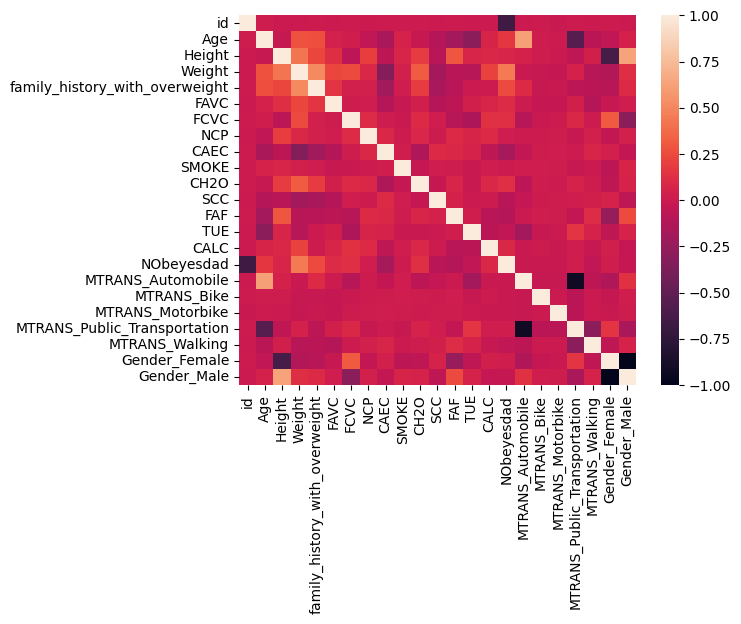

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df = df.set_index('id')

In [ ]:
df_train = df[:len(train_df)]
df_test = df[len(train_df):]
df_test = df_test.drop(columns = ['NObeyesdad'])

In [ ]:
df_train.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male
id,,,,,,,,,,,,,,,,,,,,,
0,24.443011,1.699998,81.669950,True,True,2.000000,2.983297,1,False,2.763573,...,0.976473,1,3,False,False,False,True,False,False,True
1,18.000000,1.560000,57.000000,True,True,2.000000,3.000000,2,False,2.000000,...,1.000000,0,1,True,False,False,False,False,True,False
2,18.000000,1.711460,50.165754,True,True,1.880534,1.411685,1,False,1.910378,...,1.673584,0,0,False,False,False,True,False,True,False
3,20.952737,1.710730,131.274851,True,True,3.000000,3.000000,1,False,1.674061,...,0.780199,1,6,False,False,False,True,False,True,False
4,31.641081,1.914186,93.798055,True,True,2.679664,1.971472,1,False,1.979848,...,0.931721,1,3,False,False,False,True,False,False,True


In [ ]:
df_test.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male
id,,,,,,,,,,,,,,,,,,,,,
20758,26.899886,1.848294,120.644178,True,True,2.938616,3.000000,1,False,2.825629,...,0.855400,0.000000,1,False,False,False,True,False,False,True
20759,21.000000,1.600000,66.000000,True,True,2.000000,1.000000,1,False,3.000000,...,1.000000,0.000000,1,False,False,False,True,False,True,False
20760,26.000000,1.643355,111.600553,True,True,3.000000,3.000000,1,False,2.621877,...,0.000000,0.250502,1,False,False,False,True,False,True,False
20761,20.979254,1.553127,103.669116,True,True,2.000000,2.977909,1,False,2.786417,...,0.094851,0.000000,1,False,False,False,True,False,False,True
20762,26.000000,1.627396,104.835346,True,True,3.000000,3.000000,1,False,2.653531,...,0.000000,0.741069,1,False,False,False,True,False,True,False


In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
X = df_train.drop(columns=['NObeyesdad'])
y = df_train['NObeyesdad']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)

In [ ]:
model = OneVsOneClassifier(LinearSVC(random_state=0))
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_pred,y_val)
print(accuracy)

0.861271676300578


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_val)
accuracy = accuracy_score(y_pred,y_val)
print(accuracy)

0.8439306358381503


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_3 = KNeighborsClassifier(n_neighbors = 10)
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_val)
accuracy = accuracy_score(y_pred,y_val)
print(accuracy)

0.8528420038535646


In [ ]:
y_test = model.fit(X,y).predict(df_test)

In [ ]:
y_test.reshape(-1,1)

array([[5],
       [2],
       [6],
       ...,
       [0],
       [1],
       [5]])

In [ ]:
df_test.shape

(13840, 21)

In [ ]:
df_test['NObeyesdad'] = y_test

In [ ]:
sub_df = pd.DataFrame(y_test, columns = ['NObeyesdad'])

In [ ]:
sub_df.shape

(13840, 1)

In [ ]:
sub_df['id'] = df_test.index

In [ ]:
sub_df = sub_df.set_index('id')

In [ ]:
sub_df.shape

(13840, 1)

In [ ]:
sub_df.head()

,NObeyesdad
id,
20758,5
20759,2
20760,6
20761,4
20762,6


In [ ]:
sub_df['NObeyesdad'] = sub_df['NObeyesdad'].map({3: 'Overweight_Level_II', 1: 'Normal_Weight', 0: 'Insufficient_Weight',
 6:'Obesity_Type_III',5: 'Obesity_Type_II' , 2: 'Overweight_Level_I',
 4: 'Obesity_Type_I'})

In [ ]:
sub_df.head()

,NObeyesdad
id,
20758,Obesity_Type_II
20759,Overweight_Level_I
20760,Obesity_Type_III
20761,Obesity_Type_I
20762,Obesity_Type_III


In [ ]:
sub_df.unique()

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III',
       'Obesity_Type_I', 'Insufficient_Weight', 'Normal_Weight',
       'Overweight_Level_II'], dtype=object)

In [ ]:
sub_df.to_csv('submission.csv')
#

In [ ]:
sub_df.shape

(13840,)

In [ ]:
sample_sub = pd.read_csv('/content/drive/My Drive/Colab data/Kaggle/multi-class-prediction-obesity/sample_submission.csv')

In [ ]:
sample_sub.shape

(13840, 2)